# Transcript from Lecture 1, January 12, 2023


In [1]:
# These are the standard imports for CS 111. 
# This list may change as the quarter goes on.

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import cs111

%matplotlib inline

np.set_printoptions(precision = 4)

## <c><h2>The temperature problem:</h2></c>

A cabin in the snow has all its walls at 32 degrees Farenheit,
except for a radiator at 212 degrees on one wall.
What is the temperature at each point inside the cabin?

For this model, we take the cabin to be 2-dimensional and square, and we discretize the interior
of the cabin into a grid of k by k points. The temperature at any given point is (approximately)
the average of the temperatures at the four neighboring points. 
This fact gives us one linear equation at each point, for a total of n = k<sup>2</sup> linear equations
in the k<sup>2</sup> variables representing the temperatures at each point.

We express this system of n linear equations in matrix form as A * x = b, where A is an n-by-n
matrix (most of whose entries are zero), b is a right-hand size vector of n entries that among other
things encodes the boundary temperatures, and the unknown vector x is the temperature at each interior point.

This code sets up the matrix A and the vector b, uses scipy to solve the linear system for x, and 
uses matplotlib to visualize x.

In [2]:
# Poisson equation (temperature equation) in 2D.

# Choose how finely to discretize
k = 100

# Get the matrix (the finite-difference discretization of the Laplace operator)
A = cs111.make_A(k)

# Get the right-hand side, with boundary conditions
rad_wall = cs111.radiator(k)
b = cs111.make_b(k, top = rad_wall)


In [3]:
A

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

In [4]:
A.shape

(10000, 10000)

In [5]:
b.shape

(10000,)

In [6]:
A[0,0]

4.0

In [7]:
A[351,372]

0.0

In [8]:
A[20,20]

4.0

In [9]:
b

array([64., 32., 32., ..., 32., 32., 64.])

In [10]:
b[0:50]

array([ 64.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32., 212., 212., 212., 212., 212., 212., 212., 212., 212.,
       212., 212., 212., 212., 212., 212.])

In [11]:
b[340:350]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
x = scipy.sparse.linalg.spsolve(A,b) # ugly!

In [13]:
x 

array([32.0622, 32.1247, 32.1881, ..., 32.0256, 32.0171, 32.0085])

In [14]:
k

100

In [15]:
k*k

10000

Text(0.5, 1.0, '2-dimensional Poisson equation (temperature)')

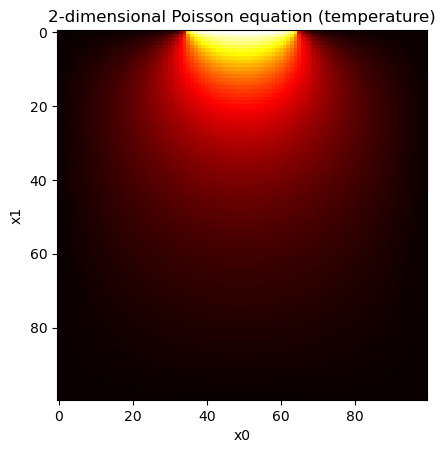

In [16]:
T = x.reshape(k, k)
plt.figure()
plt.imshow(T, cmap=cm.hot)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('2-dimensional Poisson equation (temperature)')